# Coupon Data Analysis

In this assignment, our task is to answer the question “Will a customer accept the coupon?” - essentially giving a recommendation on how to optimize a coupon campaign to yield the best coupon acceptance results. The details of the coupon campaign involve delivering digital coupons to drivers in various redemption categories - a bar, a coffee shop, a cheaper restaurant (under \\$20), and a more expensive restaurant (\\$20 - \\$50).

We were given the Problem Statement below.

## Problem Statement
**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. There are three possible answers people can choose from:

1. “Right away”
2. “Later, before the coupon expires”
3. “No, I do not want the coupon”
   
The first two responses are labeled as “Y = 1,” and the third is labeled as “Y = 0.” There are five different types of coupons: Less expensive restaurants (under \\$20), coffee houses, carryout and takeaway, bars, and more expensive restaurants (\\$20–\\$50).

Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

## Data Setup

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## Data Cleaning

**Overview**
1. Removed duplicates
2. Removed car column
3. Removed rows with NaN in them
4. Standardize column names and fix typos in names

After all the steps above, we end up with 12,007 rows x 25 columns instead of the original 12,684 rows × 26 columns.

**1. Removed duplicates**

In [10]:
print(f'There are {data.duplicated().sum()} duplicated rows')

There are 74 duplicated rows


We see there are 74 duplicate rows out of 12684 total rows, which accounts for only .58% of the data. 
We are hypothesizing these are accidentally re-submitted / counted values for the same person because it is
unlikely that the same exact factors across all the columns are legitimate separate inputs that apply to different people. Thus, let's remove these duplicate values.

In [12]:
cleaned_data = data.drop_duplicates()

**2. Removed car column**

There are now 12610 rows remaining after dropping the duplicates. From `data.info()`, we can see there is a lot of missing data in the car column. Only 108 out of 12610 rows have car data, which is equivalent to only 0.86% of the data. Thus, we can just drop this column since there's not enough information to yield valuable insights.

In [15]:
cleaned_data = cleaned_data.drop(columns=['car'])

**3. Removed rows with NaN in them**

In [17]:
# Counting the number of rows with a NaN value
num_rows_with_nan = cleaned_data.isnull().any(axis=1).sum() 
print(f'Number of rows with NaN: {num_rows_with_nan}')

# Percentage of rows with NaN
percentage_of_rows_with_nan = num_rows_with_nan / len(cleaned_data) * 100
print(f'Percentage of rows with NaN: {percentage_of_rows_with_nan:.2f}%')

Number of rows with NaN: 603
Percentage of rows with NaN: 4.78%


Because the percentage of rows containing an NaN value is < 5% of all the data, I think it's okay to drop those rows as there's still enough rows left to analyze

In [19]:
cleaned_data = cleaned_data.dropna()

**4. Standardize column names and fix typos in names**

Now, let's standardize column names into snakecase and fix typos

In [22]:
column_renaming = {
    'passanger': 'passenger',
    'maritalStatus': 'marital_status',
    'Bar': 'bar',
    'CoffeeHouse': 'coffee',
    'CarryAway': 'take_out',
    'RestaurantLessThan20': 'restaurant_less_than_20',
    'Restaurant20To50': 'restaurant_20_to_50',
    'toCoupon_GEQ5min': 'to_coupon_GEQ_5_min',
    'toCoupon_GEQ15min': 'to_coupon_GEQ_15_min',
    'toCoupon_GEQ25min': 'to_coupon_GEQ_25_min',
    'Y': 'will_accept_coupon',
}
cleaned_data = cleaned_data.rename(columns=column_renaming)

In [23]:
cleaned_data

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee,take_out,restaurant_less_than_20,restaurant_20_to_50,to_coupon_GEQ_5_min,to_coupon_GEQ_15_min,to_coupon_GEQ_25_min,direction_same,direction_opp,will_accept_coupon
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


## Data Analysis

In [25]:
df = cleaned_data

### Analysis Part 1: Df.describe() takeaways

In [27]:
df.describe()

,temperature,has_children,to_coupon_GEQ_5_min,to_coupon_GEQ_15_min,to_coupon_GEQ_25_min,direction_same,direction_opp,will_accept_coupon
count,12007.000000,12007.000000,12007.0,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000
mean,63.301408,0.408845,1.0,0.559507,0.116266,0.215957,0.784043,0.568418
std,19.131641,0.491641,0.0,0.496467,0.320556,0.411502,0.411502,0.495317
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Things to Note from Analysis Part 1:
* 56.8% of people accepted the coupon
* Direction
   * 78.4% were given a coupon in the opposite direction
   * 21.6% were given a coupon in the same direction
* Drive Time
   * 11.6% had to drive >= 25 min to get to the destination
   * 44.3% had to drive between 15 to 25 min to get to the destination
       * `mean of to_coupon_GEQ_25_min` - `mean of to_coupon_GEQ_15_min`
       * 0.559507 - 0.116266 = 0.443241
   * 44.1% had to drive between 5 to 15 min to get to the destination
       * 100 - (`percent drive >= 25 min` + `percent drive between 15 to 25 min`)
       * 100 - (11.6 + 44.3)

### Analysis Part 2. Look at which columns exist and what input data exists per column

In [30]:
df.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'marital_status', 'has_children',
       'education', 'occupation', 'income', 'bar', 'coffee', 'take_out',
       'restaurant_less_than_20', 'restaurant_20_to_50', 'to_coupon_GEQ_5_min',
       'to_coupon_GEQ_15_min', 'to_coupon_GEQ_25_min', 'direction_same',
       'direction_opp', 'will_accept_coupon'],
      dtype='object')

In [31]:
for col in df.columns:
    print(df[col].value_counts(), '\n')

destination
No Urgent Place    5953
Home               3078
Work               2976
Name: count, dtype: int64 

passenger
Alone        6914
Friend(s)    3142
Partner      1018
Kid(s)        933
Name: count, dtype: int64 

weather
Sunny    9545
Snowy    1323
Rainy    1139
Name: count, dtype: int64 

temperature
80    6171
55    3652
30    2184
Name: count, dtype: int64 

time
6PM     3068
7AM     2976
10AM    2154
2PM     1913
10PM    1896
Name: count, dtype: int64 

coupon
Coffee House             3809
Restaurant(<20)          2646
Carry out & Take away    2233
Bar                      1906
Restaurant(20-50)        1413
Name: count, dtype: int64 

expiration
1d    6702
2h    5305
Name: count, dtype: int64 

gender
Female    6158
Male      5849
Name: count, dtype: int64 

age
21         2526
26         2388
31         1906
50plus     1725
36         1251
41         1061
46          648
below21     502
Name: count, dtype: int64 

marital_status
Married partner      4799
Single           

### Analysis Part 3. Explore Correlations with One Hot Encoding

Let's one hot encode some of the categorical columns if they don't have too many unique values - that way we don't increase the dimensionality of our data too greatly 

In [34]:
print('# of unique values per column')
column_unique_values_dict = {}
for col in df.columns:
    column_unique_values_dict[col] = df[col].nunique()
    print(f'{col}: {column_unique_values_dict[col]}')

# of unique values per column
destination: 3
passenger: 4
weather: 3
temperature: 3
time: 5
coupon: 5
expiration: 2
gender: 2
age: 8
marital_status: 5
has_children: 2
education: 6
occupation: 25
income: 9
bar: 5
coffee: 5
take_out: 5
restaurant_less_than_20: 5
restaurant_20_to_50: 5
to_coupon_GEQ_5_min: 1
to_coupon_GEQ_15_min: 2
to_coupon_GEQ_25_min: 2
direction_same: 2
direction_opp: 2
will_accept_coupon: 2


Based on the above, let's one hot encode the categorical columns with < 5 unique values per column - that equates to
* destination: 3
* passenger: 4
* weather: 3
* temperature: 3
* time: 5
* coupon: 5
* expiration: 2
* gender: 2
* marital_status: 5
* has_children: 2
* bar: 5
* coffee: 5
* take_out: 5
* restaurant_less_than_20: 5
* restaurant_20_to_50: 5

In [36]:
one_hot_encoded_columns = 3 + 4 + 3 + 3 + 5 + 5 + 2 + 2 + 5 + 2 + 5 + 5 + 5 + 5 + 5
print(f'This equates to adding {one_hot_encoded_columns} more columns')

This equates to adding 59 more columns


In [37]:
columns_to_one_hot_encode = ['destination', 'passenger', 'weather', 'temperature', 
                             'time', 'coupon', 'expiration', 'gender',
                             'marital_status', 'has_children', 'bar', 'coffee', 'take_out',
                            'restaurant_less_than_20', 'restaurant_20_to_50', ]

In [38]:
df_encoded = pd.get_dummies(df, columns=columns_to_one_hot_encode)

In [39]:
encoded_correlation = df_encoded.corr(numeric_only=1)['will_accept_coupon']

In [40]:
print(encoded_correlation.to_string())

to_coupon_GEQ_5_min                      NaN
to_coupon_GEQ_15_min               -0.082860
to_coupon_GEQ_25_min               -0.105185
direction_same                      0.014748
direction_opp                      -0.014748
will_accept_coupon                  1.000000
destination_Home                   -0.071476
destination_No Urgent Place         0.130559
destination_Work                   -0.078907
passenger_Alone                    -0.100726
passenger_Friend(s)                 0.129314
passenger_Kid(s)                   -0.042294
passenger_Partner                   0.015302
weather_Rainy                      -0.069108
weather_Snowy                      -0.064451
weather_Sunny                       0.100143
temperature_30                     -0.029391
temperature_55                     -0.041618
temperature_80                      0.060992
time_10AM                           0.036650
time_10PM                          -0.046445
time_2PM                            0.081147
time_6PM  

In [41]:
pos_corr = encoded_correlation[encoded_correlation > 0.1]
pos_corr

will_accept_coupon              1.000000
destination_No Urgent Place     0.130559
passenger_Friend(s)             0.129314
weather_Sunny                   0.100143
coupon_Carry out & Take away    0.161511
coupon_Restaurant(<20)          0.151708
expiration_1d                   0.131872
Name: will_accept_coupon, dtype: float64

In [42]:
neg_corr = encoded_correlation[encoded_correlation < -0.1]
neg_corr

to_coupon_GEQ_25_min   -0.105185
passenger_Alone        -0.100726
coupon_Bar             -0.137309
coupon_Coffee House    -0.100120
expiration_2h          -0.131872
coffee_never           -0.129865
Name: will_accept_coupon, dtype: float64

#### Things to Note from Analysis Part 3:
Based on the postive correlations > 0.1, and the negative correlations < -0.1 

People are more likely to accept the coupon if one of the following is true:
* destination_No Urgent Place     0.130559
* passenger_Friend(s)             0.129314
* weather_Sunny                   0.100143
* coupon_Carry out & Take away    0.161511
* coupon_Restaurant(<20)          0.151708
* expiration_1d                   0.131872

People are less likely to accept the coupon if one of the following is true: 
* to_coupon_GEQ_25_min   -0.105185
* passenger_Alone        -0.100726
* coupon_Bar             -0.137309
* coupon_Coffee House    -0.100120
* expiration_2h          -0.131872
* coffee_never           -0.129865

### Analysis Part 4: Looking at Percentage Acceptance Rate Per Column

In [45]:
def print_percentage_accept_coupon(col, df, filter_values_gte=None):
    df_col_true = df.query(f'`{col}` == 1')
    if len(df_col_true) == 0:
        return
        
    result = df_col_true['will_accept_coupon'].sum() / len(df_col_true) * 100
    if filter_values_gte == None or result >= filter_values_gte:
        print(f'{col} {result:.2f}%')

In [46]:
for col in pos_corr.index:
    print_percentage_accept_coupon(col, df_encoded)

will_accept_coupon 100.00%
destination_No Urgent Place 63.36%
passenger_Friend(s) 67.60%
weather_Sunny 59.36%
coupon_Carry out & Take away 73.58%
coupon_Restaurant(<20) 70.98%
expiration_1d 62.65%


In [47]:
for col in df_encoded.columns:
    print_percentage_accept_coupon(col, df_encoded, 65)

will_accept_coupon 100.00%
passenger_Friend(s) 67.60%
time_2PM 66.07%
coupon_Carry out & Take away 73.58%
coupon_Restaurant(<20) 70.98%
coffee_1~3 65.11%
restaurant_20_to_50_4~8 65.35%
restaurant_20_to_50_gt8 66.29%


#### Things to Note from Analysis Part 4:

The highest (above 70% chance of accepting the coupon) were from: 
* coupon_Carry out & Take away: 73.58%
* coupon_Restaurant(<20): 70.98%

The next highest were from:
* passenger_Friend(s): 67.6%
* time_2PM: 66.07%
* coffee_1~3: 65.11%
* restaurant_20_to_50_4~8: 65.35%
* restaurant_20_to_50_gt8: 66.29%

### Analysis Part 5: Plots

#### Plot 1: Coupon Acceptance Rate vs Coupon Type

<Axes: title={'center': 'Coupon Acceptance Rate vs Coupon Type'}, xlabel='Coupon Type', ylabel='Coupon Acceptance Rate'>

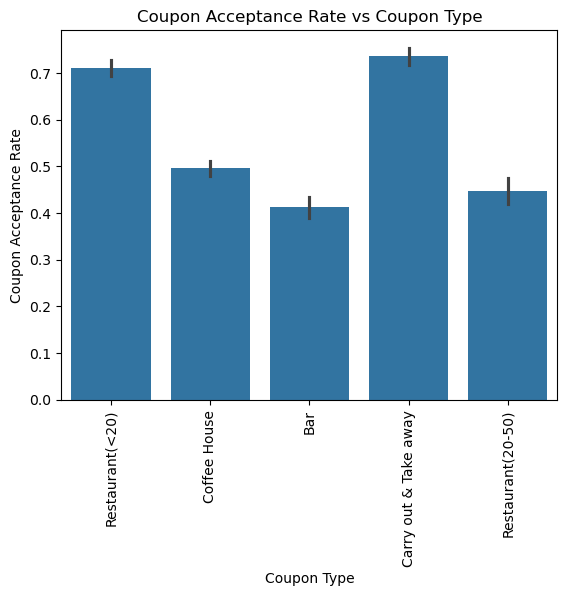

In [51]:
plt.title('Coupon Acceptance Rate vs Coupon Type')
plt.xticks(rotation=90)
plt.ylabel('Coupon Acceptance Rate')
plt.xlabel('Coupon Type')
sns.barplot(cleaned_data, x='coupon', y='will_accept_coupon')

#### Plot 2: Income Distribution

In [53]:
income_order=['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']

<Axes: title={'center': 'Income Distribution'}, xlabel='Income ($)', ylabel='Count'>

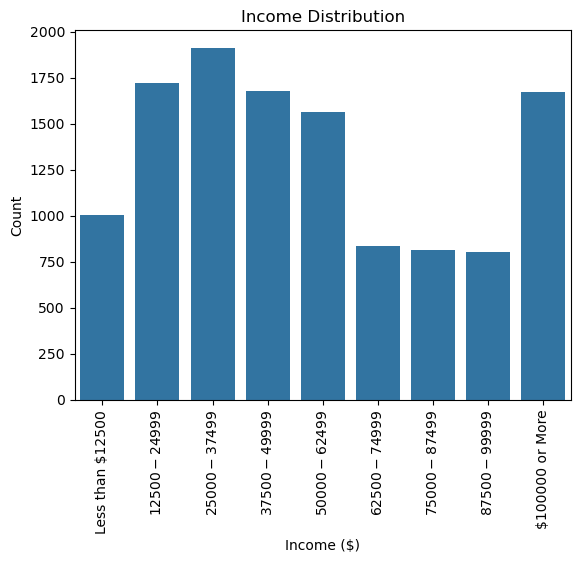

In [54]:
plt.title('Income Distribution')
plt.xticks(rotation=90)
plt.xlabel('Income ($)')
plt.ylabel('Count')
sns.countplot(data=cleaned_data, x='income', order=income_order)

We can see that most people had an income below $62,500.

#### Plot 3: Coupon Acceptance Pie Chart

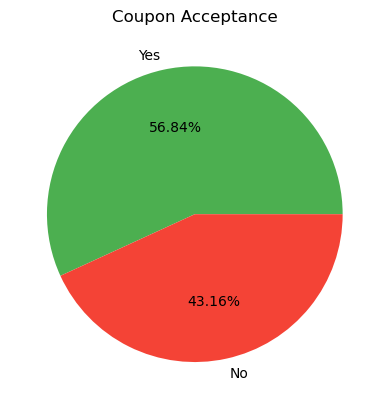

In [57]:
accept_coupon_value_counts = cleaned_data['will_accept_coupon'].value_counts()
plt.title('Coupon Acceptance')
plt.pie(accept_coupon_value_counts, labels=['Yes', 'No'], autopct='%1.2f%%', colors=['#4CAF50', '#F44336'])
plt.show()